## Метод эталонов. ТПР 8
#### Козловский А.А., гр. 2253

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle, Circle

In [11]:
first_count, second_count = 100, 200
first_mean, first_std = (10, 14), (3, 4)
second_min, second_max = (30, 56), (46, 84)

first = np.array([[np.random.normal(first_mean[0], 
                                    first_std[0], first_count)],
                  [np.random.normal(first_mean[1], 
                                    first_std[1], first_count)]])

second = np.array([[np.random.uniform(second_min[0], 
                                     second_max[0], second_count)], 
                   [np.random.uniform(second_min[1], 
                                     second_max[1], second_count)]])



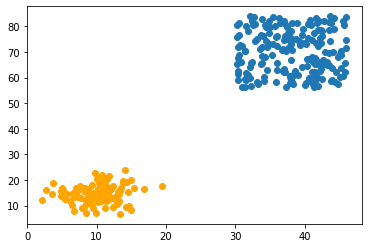

In [74]:
plt.scatter(first[0], first[1], color='orange')
plt.scatter(second[0], second[1])

In [54]:
def distance(x, y):
    return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)

In [78]:
# Определение границ 
rect = (np.min(second[0]), np.min(second[1]), np.max(second[0]), np.max(second[1]))
center = (np.mean(first[0]), np.mean(first[1]))
radius = np.max([distance(current[0], center) for current in first.T])

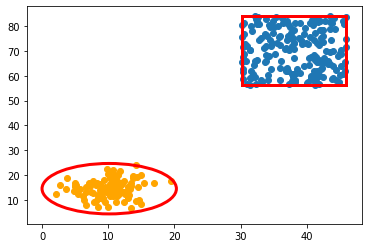

In [79]:
fig, ax = plt.subplots()

ax.scatter(first[0], first[1], color='orange')
ax.scatter(second[0], second[1])

ax.add_patch(Rectangle(rect[:2], np.abs(rect[2] - rect[0]), 
                       np.abs(rect[3] - rect[1]), facecolor='none',
                       edgecolor='red', lw=3))
ax.add_patch(Circle(center, radius, edgecolor='red', facecolor='none', lw=3))

In [156]:
def makedata(array, label):
    return np.array([array[0][0], array[1][0], np.array([label for i in range(array.shape[2])]), 
                       np.array(['' for i in range(array.shape[2])])], dtype=object).T

In [157]:
first_data = makedata(first, 'first')
second_data = makedata(second, 'second')
data = np.concatenate([first_data, second_data])

df = pd.DataFrame(columns=['x', 'y', 'actual', 'prediction'], data=data)

In [178]:
def check_ellipse(obj, center, radius):
    return (obj[0] - center[0]) ** 2 + (obj[1] - center[1]) ** 2 <= radius ** 2

In [166]:
def check_rect(obj, min_, max_):
    return (obj[0] >= min_[0] and obj[0] <= max_[0] and 
            obj[1] >= min_[0] and obj[1] <= max_[1])

In [181]:
def check_all(data, center, radius, min_, max_):
    for d in data:
        if check_ellipse(d[:2], center, radius):
            d[3] = 'first'
        elif check_rect(d[:2], min_, max_):
            d[3] = 'second'
            
    return data

In [187]:
checked_data = check_all(data, center, radius, rect[:2], rect[2:])
checked_df = pd.DataFrame(columns=df.columns, data=checked_data)
checked_df

,x,y,actual,prediction
0,14.340018,19.253972,first,first
1,11.462756,15.619155,first,first
2,13.050433,15.362229,first,first
3,9.440171,8.995339,first,first
4,12.046722,16.401269,first,first
...,...,...,...,...
295,39.332921,72.590732,second,second
296,41.074694,74.531008,second,second
297,41.768551,81.418552,second,second
298,43.772946,58.511889,second,second


In [188]:
def report(checked_data):
    errors_count = 0
    for d in checked_data:
        if d[3] != d[2]:
            errors_count += 1
            
    return errors_count

In [189]:
report(checked_data)

0